<a href="https://colab.research.google.com/github/woryts/omm-praki/blob/main/%D0%A1%D1%82%D1%8B%D1%80%D0%BE%D0%B2_%D0%9E%D0%9C%D0%9C_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотеки, которые используются в решении:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import time
%matplotlib inline

# Практическое задание №2 по ОММ 
# Вариант №10
### Стыров Даниил, 307 группа.

## Постановка задачи
Используя метод переменных направлений, решить краевую задачу:

$$\left\{ \begin{array}{} 
\frac{\partial u}{\partial t} = \Delta u + \cos{\pi y}\ e^t, \quad  0 < x < 1,\ 0 < y < 1,\ 0 < t \leq 1 \\ 
u(0,y,t) = u(1,y,t) = 0, \\ 
u_y(x,0,t) = u_y(x,1,t) = 0, \\ 
u(x,y,0) = 0. \end{array} \right.$$

##  Аналитическое решение задачи
Ищем решение задачи в виде:

$$u(x,y,t)=T(t)V(x,y)$$

Тогда, разделяя переменные, получим:

$$\frac{T'(t)}{T(t)}=\frac{V''(x,y)}{V(x,y)}=-\lambda$$

Имеем две задачи:

$$\left\{ \begin{array}{} T'+\lambda T = 0 \\ T(0)=0 \end{array} \right.$$

$$\left\{ \begin{array}{} \Delta V +\lambda V = 0 \\ 
V\big|_{x=0}=V\big|_{x=1}=0 \\ 
\frac{\partial V}{\partial y}\big|_{y=0}=\frac{\partial V}{\partial y}\big|_{y=1}=0\end{array} \right.$$

Ищем функцию $V$ в виде $V(x,y)=X(x)Y(y)$ и, разделяя переменные, получаем две задачи Штурма-Лиувилля на отрезке:

$$\left\{ \begin{array}{} X''+\mu X = 0 \\ X (0)= X (1) = 0 \end{array} \right.$$

$$\left\{ \begin{array}{} Y''+\nu Y = 0 \\ \frac{\partial Y}{\partial y}\big|_{y=0}=\frac{\partial Y}{\partial y}\big|_{y=1}=0 \end{array} \right.$$

Отсюда решения:

$$\left\{ \begin{array}{} X=sin(\sqrt{\mu} x),\ \mu=(\pi n)^2,\ n=1,2,... , \\
 Y=cos(\sqrt{\nu} y,)\ \nu=(\pi m)^2,\ m=0,1,... ,  \end{array} \right.$$

Тогда для функции $V_{nm}$ имеем: 

$$V_{nm}=sin(\pi nx)cos(\pi my), $$
$$\lambda_{nm}=\mu_{nm}+\nu_{nm}=(\pi n)^2+(\pi m)^2$$

Рассмотрим теперь задачу Коши:

$$\left\{ \begin{array}{} T_{nm}'+\lambda_{nm} T_{nm} = f_{nm}, \\ T_{nm}(0)=0, \end{array} \right.$$

где $f_{nm}=\frac{1}{||V_{nm}||^2}\int\int_G F(x,y,t)V_{nm}(x,y)\ dx\ dy$

$$||V_{nm}||=\frac{1}{4}(1+\delta_{m,0})$$

$$f_{n,m}=\frac{4e^t}{1+\delta_{m,0}}\int_0^1 \cos(\pi y)\cos(\pi my)\ dy \int_0^1 \sin(\pi nx)\ dx = \frac{e^t}{||V_{n,1}||^2}\frac{\delta_{n,2k-1}}{\pi n}$$

$$f_{2k-1,1}=\frac{4e^t}{\pi n}$$

$$T_{nm}(t)=\int_0^t e^{-\lambda_{nm}(t-\tau)}f_{nm}(\tau)dt$$

Учитывая, что ненулевые члены только при $m=1,\ n=2k-1,\ k \in \mathbb{N}$, получим решение:

$$u(x,y,t)= 4\cos(\pi y)\sum\limits_{k=1}^\infty sin(\pi (2k-1)x)\frac{(e^t-e^{-\lambda t})}{\pi (2k-1)(1+\lambda)}$$

$$\lambda = \pi^2(1+(2k-1)^2)$$

### Построение приближенного аналитического решения

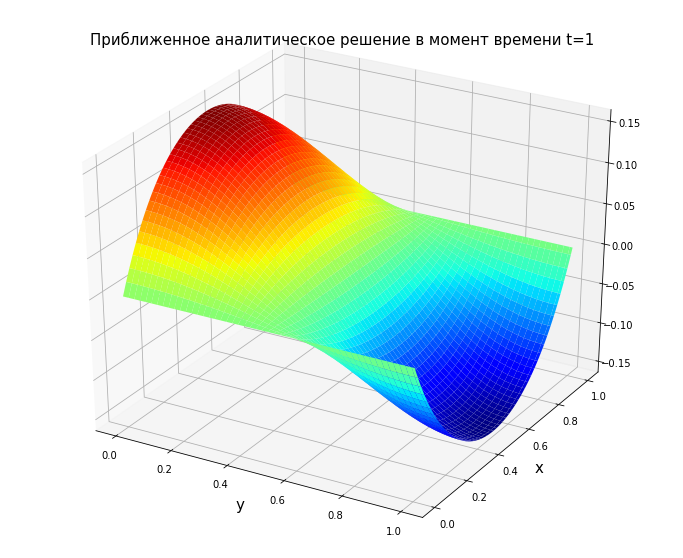

In [ ]:
Nx, Ny, M = 100, 100, 100     #число шагов вдоль x,y,t
x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Ny)
t = np.linspace(0,1,M)
hx = 1/(Nx-1)
hy = 1/(Ny-1)
tau = 1/(M-1)
gx = tau/hx**2
gy = tau/hy**2

K = 20  #Число членов ряда

def l(k):
  return np.pi**2 * (1+(2*k-1)**2)

def u_analit_sol(x,y,t):
  sum = 0
  for k in range(1,K+1):
    sum += (np.sin(np.pi*x*(2*k-1)) * (np.exp(t) - np.exp(-l(k)*t)))/((2*k-1) * np.pi*(l(k)+1))
  return 4*np.cos(np.pi*y)*sum

u_as = np.zeros((Nx, Ny), dtype=float)
for i in range(Nx):
  for j in range(Ny):
    u_as[i,j] = u_analit_sol(i*hx,j*hy,1)

xx, yy = np.meshgrid(x, y)
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, u_as[:, :], cmap='jet')
plt.title('Приближенное аналитическое решение в момент времени t=1', fontsize=15)
plt.xlabel('y', fontsize=15)
plt.ylabel('x', fontsize=15);

## Описание разностной схемы
Введем одномерные разностные временную и пространственные сетки в области 
$\Omega = G\otimes[0,T]$:

$$ G: \{(x, y)| x \in (0; 1), y \in (0; 1)\}
       \\
     \omega_{h} : \{(x_i,y_j)| x_i = ih_x, \ i = \overline{0,N_x}, \ N_xh_x = 1;
     y_j = jh_y, \ j = \overline{0,N_y}, \ N_yh_y = 1\} \\
     \omega_{\tau} : \{t_k = k\tau, \ k = \overline{0,M}, \ \tau M = T\}$$
$$\omega_{h\tau} = \omega_{h}\otimes \omega_{\tau}$$

где $M, N_x, N_y$ - число узлов сетки; $h_x, h_y, h_{\tau}$ - шаги по осям x, y, t соответственно. 

На введенной сетке будем рассматривать сеточные функции:

$$U^k_{ij} = U(x_i, y_j, t^k)$$

Разностная аппрокимация оператора Лапласа будет иметь вид:

$$\Lambda U^k_{ij} = \Lambda_x U^k_{ij} + \Lambda_y U^k_{ij}\\
  \Lambda_x U^k_{ij} = \dfrac{U^k_{i+1,j} - 2 U^k_{ij} + U^k_{i-1,j}}{h_x^2}\\
  \Lambda_y U^k_{ij} = \dfrac{U^k_{i,j+1} - 2 U^k_{ij} + U^k_{i,j-1}}{h_y^2}
$$

Граничные условия по $x$ аппроксимируются точно: 

$$U^k_{0j}=U^k_{N_x, j}=0$$

Для граничных условий Неймана по $y$ введем аппроксимацию односторонней
разностной производной:
$$
\begin{cases}
        \dfrac{U^k_{i1} - U^k_{i0}}{h_y} = 0, \\
        \dfrac{U^k_{iN_{y}} - U^k_{i,N_{y}-1}}{h_y} = 0,  \\
        \ k = \overline{0,N_{\tau}}, \ i = \overline{0,N_x}.
\end{cases}
$$
Тогда порядок аппроксимации по этому граничному условию будет лишь $o(h_y)$.


Аппроксимируем уравнение теплопроводности из задачи следующим разностным уравнением:

$$\dfrac{U^{k+1}_{ij} - U^k_{ij}}{\tau} = \Lambda (\delta U^{k+1}_{ij} + (1 - \delta)U^k_{ij}) + f^k_{ij}$$

$$f^k_{ij} = cos(\pi y_j)e^{t^k}, \ i = \overline{0,N_x-1}, \  j = \overline{0,N_y-1}, \ k = \overline{0,N_{\tau}-1}$$

При $\delta = 0$ получаем явную разностную схему, и решение во внутренних точках вычисляется по формуле:
$$U^{k+1}_{ij} = U^k_{ij} + \tau (\Lambda_x U^k_{ij} + \Lambda_y U^k_{ij}) + \tau f^k_{ij}$$


При $\delta = 1$ получаем неявную разностную схему. Для определения $U^{k+1}_{ij}$ мы получаем на каждом шаге линейную систему: 
$$ U^{k+1}_{ij} - \tau (\Lambda_x U^{k+1}_{ij} + \Lambda_y U^{k+1}_{ij}) = U^k_{ij} + \tau f^k_{ij}$$

В  схеме  переменных  направлений  переход  со  слоя  на слой  осуществляется  в  два  этапа  с помощью вычисления промежуточного временного слоя $m+\frac{1}{2}$. Разностная аппроксимация уравнения имеет вид:

$$\frac{U^{k+\frac{1}{2}}-U^k}{\frac{1}{2}\tau} = \Lambda_xU^{k+\frac{1}{2}}+\Lambda_yU^k$$

$$\frac{U^{k+1}-U^{k+\frac{1}{2}}}{\frac{1}{2}\tau} = \Lambda_xU^{k+\frac{1}{2}}+\Lambda_yU^{k+1}$$

Переход со слоя $k$ к слою $k+1$ осуществляется в два этапа с шагом $\tau/2$. Сначала решается первое уравнение, являющееся неявным по направлению $x$ и явным по направлению $y$, а затем второе уравнение, которое является явным по направлению $х$ и неявным по направлению $y$. При решении  в  обоих  случаях  используется  метод  прогонки.  Значение  сеточной  функции  на промежуточном  слое  играет  вспомогательную  роль.Схема  переменных  направлений безусловно устойчива при любых шагах $ℎ_x,ℎ_y,\tau$.

Так  как  в  данной  задаче  граничное  условие  по y аппроксимируется  первым  порядком погрешности по координате y, то вся схема не может иметь более точное решение и меньшую погрешность  по  координатам.  Таким  образом,  в  задаче  с  граничным  условием  Неймана разностная схема имеет точность аппроксимации $o(h_y)$.

## Метод прогонки

Метод прогонки, используемый в данной задаче, основывается на решении линейных систем с трехдиагональной матрицей.
Рассмотрим систему:
$$\begin{equation}
 \left\{
\begin{aligned}
& -c_{0}y_{0}+b_{0}y_{1} = -f_{0}\\
& a_{i}y_{i-1} - c_{i}y_{i}+b_{i}y_{i+1} = -f_{i}, i=\overline{1,N-1}\\
& a_{N}y_{N-1} - c_{N}y_{N} = -f_{N}
\end{aligned} \right.
\end{equation}$$

Если $c_{0}\neq{0}$, то выразим первый элемент системы: $y_{0}=\alpha_{0}y_{1}+\beta_{0}$, где $\alpha_{0}=\frac{b_{0}}{c_{0}}$, $\beta_{0}=\frac{f_{0}}{c_{0}}$, 
Подставим $y_{0}$ во второе уравнение и найдем связь между $y_{1}$ и $y_{2}$. Данный процесс мы можем продолжать рекурентно, получая, таким образом, следующую систему:

$$\begin{equation}
 \left\{
\begin{aligned}
& y_{i}=\alpha_{i+1}y_{i+1}+\beta_{i+1}, i=\overline{0,N-1}\\
& y_{N} = \beta_{N}
\end{aligned} \right.
\end{equation}$$

С помощью этой системы мы осуществляем прямой ход прогонки - нахождение коэффициентов системы по формулам:
$$ \alpha_{i}=\frac{b_{i}}{c_{i}-a_{i}\alpha_{i-1}}$$

$$ \beta_{i}=\frac{f_{i}+a_{i} \beta_{i}}{c_{i}-a_{i}\alpha_{i-1}}$$

В задаче мы будем использовать метод прогонки дважды, соответственно, используя равенства  $a_{i}=A_{x}$ $b_{i}=B_{x}$ $c_{i}=C_{x}$ при прогонке по $x$ и $a_{i}=A_{y}$ $b_{i}=B_{y}$ $c_{i}=C_{y}$  при прогонке по $y$.

Затем, по найденным коэффициентам, мы можем найти значения функции $y_{i}$ по методу обратной прогонки.

Выпишем уравнения и граничные условия из систем, для которых мы собираемся применить метод прогонки:

\begin{align}
        \begin{cases}
            \dfrac{0.5\tau}{h_x^2}U^{k + \frac{1}{2}}_{i+1,j} - (1 + \dfrac{\tau}{h_x^2})U^{k + \frac{1}{2}}_{ij} + \dfrac{0.5\tau}{h_x^2}U^{k + \frac{1}{2}}_{i-1,j} = - F^{k + \frac{1}{2}}_{ij} \\
            U^k_{0j}=U^k_{N_{x},j}=0
        \end{cases}
\end{align}

\begin{align}
        \begin{cases}
            \dfrac{0.5\tau}{h_y^2}U^{k+1}_{i,j+1} - (1 + \dfrac{\tau}{h_y^2})U^{k+1}_{ij} + \dfrac{0.5\tau}{h_y^2}U^{k+1}_{i,j-1} = - F^{k+1}_{ij} \\
            \dfrac{U^k_{i1} - U^k_{i0}}{h_y} = \dfrac{U^k_{iN_{y}} - U^k_{i,N_{y}-1}}{h_y} = 0 
        \end{cases}
\end{align}


### Построение численного решения

In [ ]:
def f(i2, j):
  return np.cos(np.pi*y[i2])*np.exp(tau*j/2) # Возможно ошибка где 0.5

def F1(i1, i2, j):
  return 0.5*gy*(u[i1,i2-1,j-1]+u[i1,i2+1,j-1]) + (1-gy)*u[i1,i2,j-1] + 0.5*tau*f(i2,j+1)

def F2(i1, i2, j):
  return 0.5*gx*(u[i1-1,i2,j-1]+u[i1+1,i2,j-1]) + (1-gx)*u[i1,i2,j-1] + 0.5*tau*f(i2,j-1)

def progonka_po_x(i2, j):
  d = np.zeros(Nx)
  s = np.zeros(Nx)
  d[1] = 0
  s[1] = 0
  A = 0.5*gx
  B = 1 + gx
  C = 0.5*gx
  for m in range(1,Nx-1):
    Fm = -F1(m,i2,j)
    d[m+1] = C/(B-A*d[m])
    s[m+1] = (Fm-A*s[m])/(A*d[m]-B)
  u[Nx-1,i2,j] = 0
  for m in range(Nx-1,0,-1):
    u[m-1,i2,j] = d[m]*u[m,i2,j] + s[m]

def progonka_po_y(i1, j):
  d = np.zeros(Ny)
  s = np.zeros(Ny)
  d[1] = 1
  s[1] = 0
  A = 0.5*gy
  B = 1 + gy
  C = 0.5*gy
  for m in range(1,Ny-1):
    Fm = -F2(i1,m,j)
    d[m+1] = C/(B-A*d[m])
    s[m+1] = (Fm-A*s[m])/(A*d[m]-B)
  u[i1,Ny-1,j] = s[-1]/(1-d[-1])
  for m in range(Ny-1,0,-1):
    u[i1,m-1,j] = d[m]*u[i1,m,j] + s[m]

In [ ]:
u = np.zeros((Nx, Ny, 2*M+1), dtype=float)

for j in range(1,2*M,2):
  for i2 in range(1,Ny-1):
    progonka_po_x(i2,j)
  for i1 in range(1,Nx-1):
    progonka_po_y(i1,j+1)

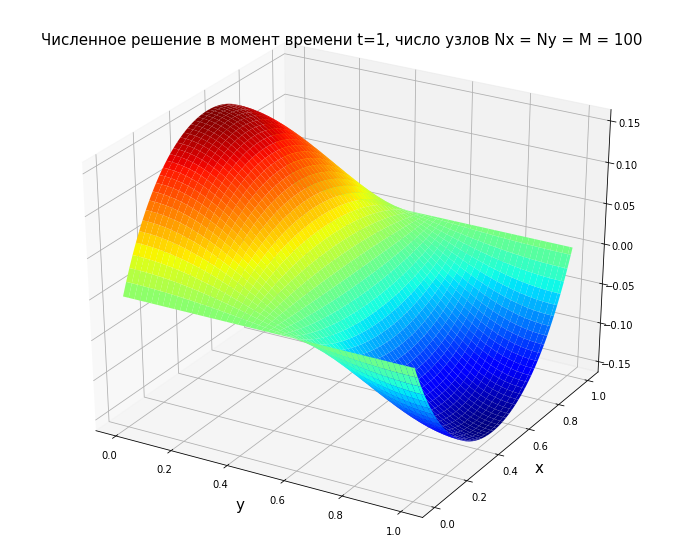

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, u[:, :, -1], cmap='jet')
plt.title('Численное решение в момент времени t=1, число узлов Nx = Ny = M = 100', fontsize=15)
plt.xlabel('y', fontsize=15)
plt.ylabel('x', fontsize=15);

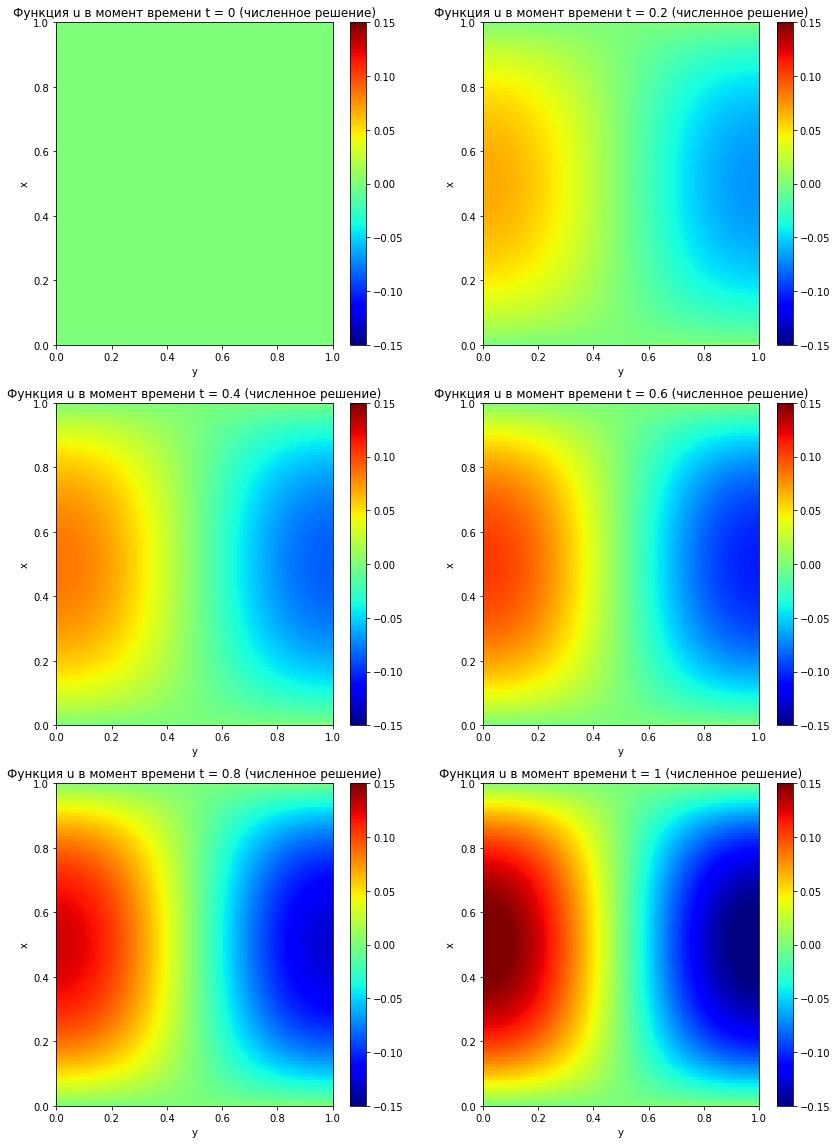

In [ ]:
times = [0, 0.2, 0.4, 0.6, 0.8, 1]
fig = plt.figure(figsize=(12,16))
for i in range(len(times)):
  plt.subplot(3,2,i+1)
  time = int(times[i]*2*M)
  plt.pcolormesh(x,y,u[:,:,time], cmap='jet', vmin=-0.15, vmax=0.15)
  plt.colorbar()
  plt.xlabel("y")
  plt.ylabel("x")
  plt.title(f"Функция u в момент времени t = {times[i]} (численное решение)")
plt.tight_layout()

## Сравнение численного решения с приближенным аналитическим

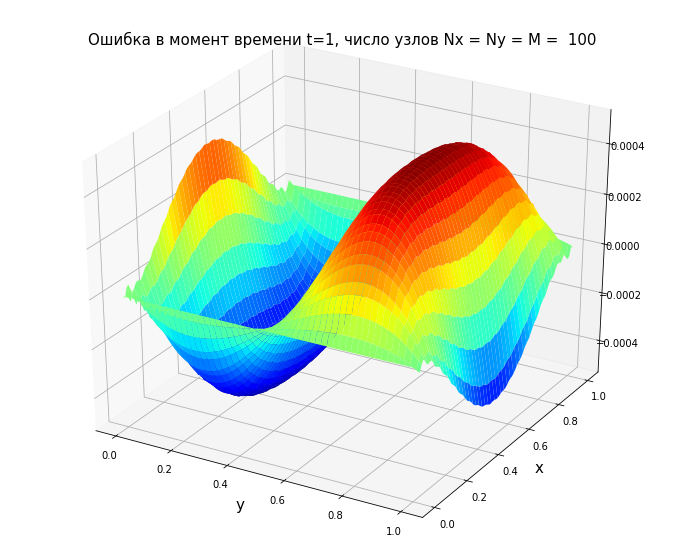

In [ ]:
u_err100 = u_as - u[:,:,-1]

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, u_err100[:, :], cmap='jet')
plt.title('Ошибка в момент времени t=1, число узлов Nx = Ny = M =  100', fontsize=15)
plt.xlabel('y', fontsize=15)
plt.ylabel('x', fontsize=15);

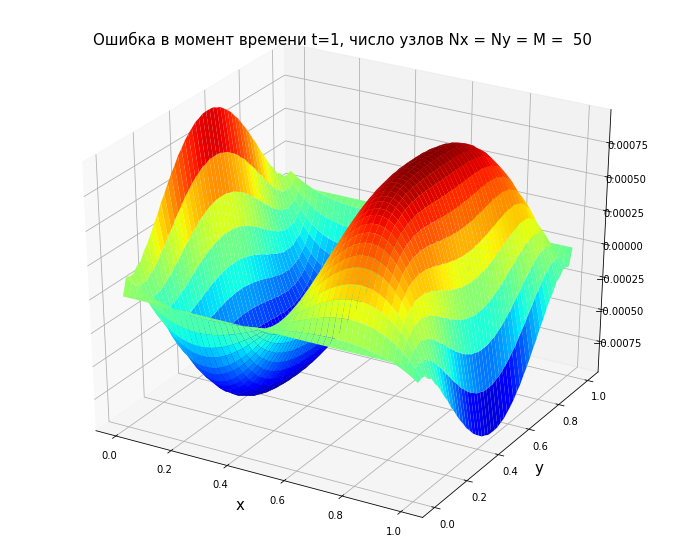

In [ ]:
Nx, Ny, M = 50, 50, 50     #число шагов вдоль x,y,t
x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Ny)
t = np.linspace(0,1,M)
hx = 1/(Nx-1)
hy = 1/(Ny-1)
tau = 1/(M-1)
gx = tau/hx**2
gy = tau/hy**2

u = np.zeros((Nx, Ny, 2*M+1), dtype=float)

for j in range(1,2*M,2):
  for i2 in range(1,Ny-1):
    progonka_po_x(i2,j)
  for i1 in range(1,Nx-1):
    progonka_po_y(i1,j+1)

u_as = np.zeros((Nx, Ny), dtype=float)
for i in range(Nx):
  for j in range(Ny):
    u_as[i,j] = u_analit_sol(i*hx,j*hy,1)

u_err50 = u_as - u[:,:,-1]

xx, yy = np.meshgrid(x, y)
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, u_err50[:, :], cmap='jet')
plt.title('Ошибка в момент времени t=1, число узлов Nx = Ny = M =  50', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15);

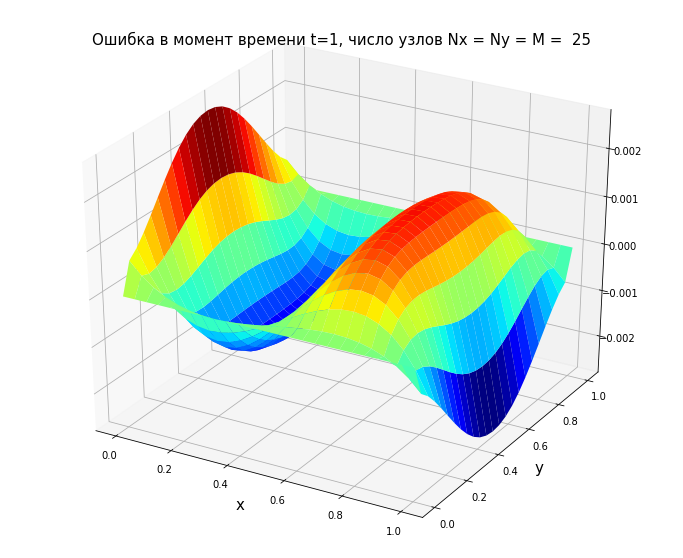

In [ ]:
Nx, Ny, M = 25, 25, 25     #число шагов вдоль x,y,t
x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Ny)
t = np.linspace(0,1,M)
hx = 1/(Nx-1)
hy = 1/(Ny-1)
tau = 1/(M-1)
gx = tau/hx**2
gy = tau/hy**2

u = np.zeros((Nx, Ny, 2*M+1), dtype=float)

for j in range(1,2*M,2):
  for i2 in range(1,Ny-1):
    progonka_po_x(i2,j)
  for i1 in range(1,Nx-1):
    progonka_po_y(i1,j+1)

u_as = np.zeros((Nx, Ny), dtype=float)
for i in range(Nx):
  for j in range(Ny):
    u_as[i,j] = u_analit_sol(i*hx,j*hy,1)

u_err25 = u_as - u[:,:,-1]

xx, yy = np.meshgrid(x, y)
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, u_err25[:, :], cmap='jet')
plt.title('Ошибка в момент времени t=1, число узлов Nx = Ny = M =  25', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15);

**Ошибка в зависимости от числа узлов сетки:**

In [ ]:
np.amax(abs(u_err100)) # максимальное отклонение от аналитического решения при Nx = Ny = M = 100

0.0005116592240402146

In [ ]:
np.amax(abs(u_err50)) # максимальное отклонение от аналитического решения при Nx = Ny = M =  50

0.0009513011166260021

In [ ]:
np.amax(abs(u_err25)) # максимальное отклонение от аналитического решения при Nx = Ny = M =  25

0.0026856452891634575